# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from tensorflow.examples.tutorials.mnist import input_data

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as

Instructions for updating:
Use the retry module or similar alternatives.


# Read Data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
train_img = mnist.train.images
train_label = mnist.train.labels
test_img = mnist.test.images
test_label = mnist.test.labels

In [4]:
valid_img = train_img[:5000]
valid_label = train_label[:5000]
train_img = train_img[5000:]
train_label = train_label[5000:]

# SVM

In [5]:
C_range = 10.0 ** np.arange(-2, 2)
gamma_range = 10.0 ** np.arange(-2, 2)
param_grid = dict(gamma=gamma_range.tolist(), C=C_range.tolist())
# Grid search for C, gamma, 3-fold CV
print("Tuning hyper-parameters\n")
clf = GridSearchCV(svm.SVC(), param_grid, cv=3, n_jobs=-2)

clf.fit(train_img, train_label)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0625, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
valid_predictions=[]
test_predictions=[]
for i in range(1000):
    if i % 100 == 0:
        print('epoch ---> '+str(int(i/100)))
    valid_output = clf.predict([valid_img[i]])
    test_output = clf.predict([mnist.test.images[i]])
    valid_predictions.append(valid_output)
    test_predictions.append(test_output)

confusion_m = confusion_matrix(mnist.test.labels[0:1000],test_predictions)

print (classification_report(mnist.test.labels[0:1000],np.array(test_predictions)))

print ('validation accuracy is :',accuracy_score(valid_label[0:1000],valid_predictions))
print ('test accuracy is :',accuracy_score(mnist.test.labels[0:1000],test_predictions))

class_names = [chr(i) for i in range(ord('0'),ord('9')+1)]

epoch ---> 0
epoch ---> 1
epoch ---> 2
epoch ---> 3
epoch ---> 4
epoch ---> 5
epoch ---> 6
epoch ---> 7
epoch ---> 8
epoch ---> 9
             precision    recall  f1-score   support

          0       0.98      0.99      0.98        85
          1       1.00      0.99      1.00       126
          2       0.97      0.98      0.97       116
          3       0.98      0.98      0.98       107
          4       0.99      0.98      0.99       110
          5       0.99      0.97      0.98        87
          6       0.99      0.98      0.98        87
          7       0.97      0.98      0.97        99
          8       0.95      0.98      0.96        89
          9       0.98      0.96      0.97        94

avg / total       0.98      0.98      0.98      1000

('validation accuracy is :', 0.979)
('test accuracy is :', 0.979)


In [7]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 84   0   0   0   0   0   1   0   0   0]
 [  0 125   1   0   0   0   0   0   0   0]
 [  0   0 114   0   0   0   0   1   1   0]
 [  0   0   0 105   0   1   0   1   0   0]
 [  0   0   1   0 108   0   0   0   0   1]
 [  0   0   0   1   1  84   0   0   1   0]
 [  2   0   0   0   0   0  85   0   0   0]
 [  0   0   1   1   0   0   0  97   0   0]
 [  0   0   1   0   0   0   0   0  87   1]
 [  0   0   0   0   0   0   0   1   3  90]]


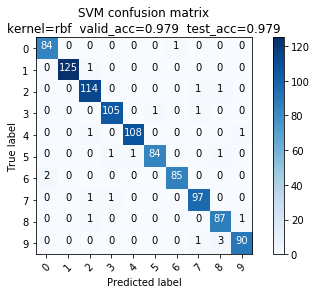

In [8]:
plot_confusion_matrix(confusion_m,classes=class_names,title='SVM confusion matrix\nkernel=rbf  valid_acc='+str(accuracy_score(valid_label[0:1000],valid_predictions))+'  test_acc='+str(accuracy_score(mnist.test.labels[0:1000],test_predictions)))